<a href="https://colab.research.google.com/github/AlexandreLarget/advanced_computer_vision/blob/main/01_ACV_machine_learning_and_neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification therory

## Classification notebook

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((381, 30), (381,), (188, 30), (188,))

In [ ]:
N, D = x_train.shape

In [ ]:
x_train[0]

array([1.104e+01, 1.683e+01, 7.092e+01, 3.732e+02, 1.077e-01, 7.804e-02,
       3.046e-02, 2.480e-02, 1.714e-01, 6.340e-02, 1.967e-01, 1.387e+00,
       1.342e+00, 1.354e+01, 5.158e-03, 9.355e-03, 1.056e-02, 7.483e-03,
       1.718e-02, 2.198e-03, 1.241e+01, 2.644e+01, 7.993e+01, 4.714e+02,
       1.369e-01, 1.482e-01, 1.067e-01, 7.431e-02, 2.998e-01, 7.881e-02])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train[0]

array([-0.94869987, -0.59105523, -0.93786753, -0.865414  ,  0.85107827,
       -0.50728577, -0.74600288, -0.65196287, -0.37056992,  0.14609766,
       -0.77898789,  0.30972131, -0.76885825, -0.635935  , -0.57502821,
       -0.89575996, -0.75815906, -0.70344276, -0.40629982, -0.64612814,
       -0.86408303,  0.10986098, -0.87670599, -0.77590371,  0.20594068,
       -0.68683835, -0.80579761, -0.64581162,  0.13789403, -0.26075591])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(loss="BinaryCrossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [ ]:
r = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=150,
          verbose=0)

In [ ]:
print("Train set evaluation: ", model.evaluate(x_train, y_train))
print("Test set evaluation: ", model.evaluate(x_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 0.9764
Train set evaluation:  [0.08734183013439178, 0.9763779640197754]
6/6 [==============================] - 0s 2ms/step - loss: 0.0814 - accuracy: 0.9734
Test set evaluation:  [0.08135539293289185, 0.9734042286872864]


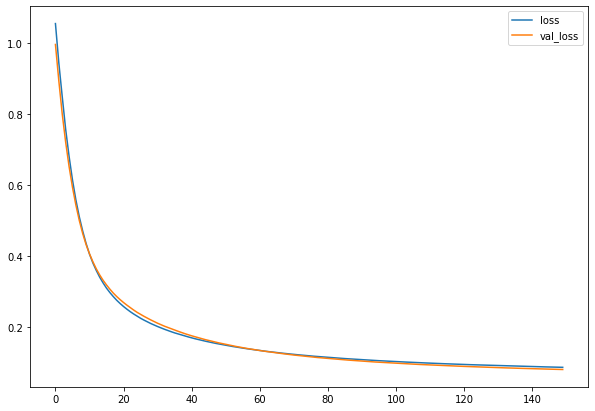

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

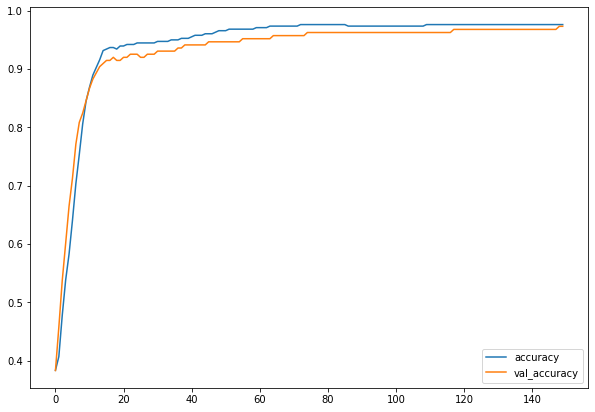

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

## Classification exercise

In [ ]:
!wget https://lazyprogrammer.me/course_files/exercises/diabetes.csv

--2022-12-06 03:11:29--  https://lazyprogrammer.me/course_files/exercises/diabetes.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/csv]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2022-12-06 03:11:29 (138 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x = data.drop("Outcome", axis=1).to_numpy()
y = data.Outcome

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
input = x_train[0].shape
x_train[0]

array([-1.12344195, -0.11202333, -0.27119291,  0.15268781,  0.06135383,
       -4.10033297,  3.80594713, -1.03163207])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(input),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.SGD(0.01),
              metrics=["accuracy"])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test),
              epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 10ms/step - loss: 0.7153 - accuracy: 0.4805 - val_loss: 0.6836 - val_accuracy: 0.5974
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5765 - val_loss: 0.6554 - val_accuracy: 0.6299
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6694 - accuracy: 0.6221 - val_loss: 0.6339 - val_accuracy: 0.6688
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.6401 - val_loss: 0.6139 - val_accuracy: 0.6948
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6373 - accuracy: 0.6580 - val_loss: 0.5961 - val_accuracy: 0.7013
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6242 - accuracy: 0.6612 - val_loss: 0.5819 - val_accuracy: 0.7468
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.6743 - val_loss: 0.5697 - val_accuracy: 0.7792
Epoch 8/100


In [ ]:
print("Train set evaluation: ", model.evaluate(x_train, y_train))
print("Test set evaluation: ", model.evaluate(x_test, y_test))

20/20 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.7801
Train set evaluation:  [0.4533945322036743, 0.7801302671432495]
5/5 [==============================] - 0s 3ms/step - loss: 0.4455 - accuracy: 0.7987
Test set evaluation:  [0.44551369547843933, 0.798701286315918]


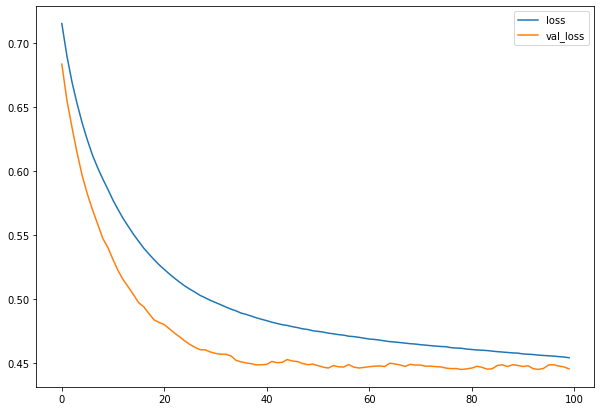

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

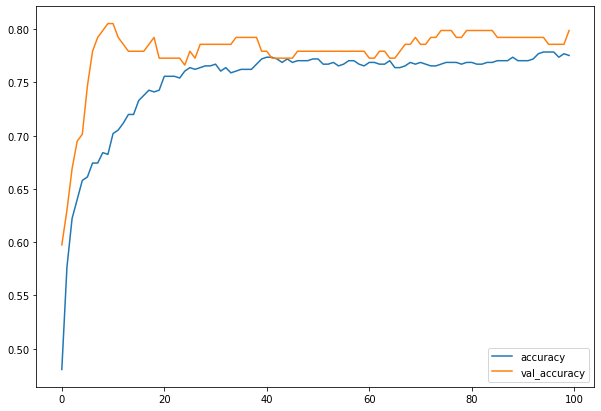

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

# Regression theorie

## Regression notebook

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-12-06 04:09:12--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-12-06 04:09:12 (21.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
data = pd.read_csv("moore.csv", header=None).values

In [ ]:
data[:5]

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100]])

In [ ]:
x = data[:,0].reshape(-1, 1)
y = data[:,1]

In [ ]:
x[:5], y[:5]

(array([[1971],
        [1972],
        [1973],
        [1973],
        [1974]]), array([2300, 3500, 2500, 2500, 4100]))

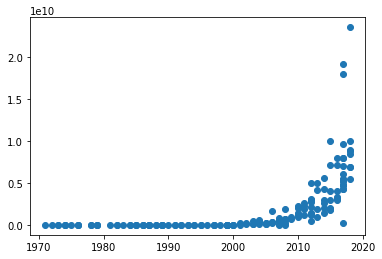

In [ ]:
plt.scatter(x, y);

In [ ]:
import numpy as np
y = np.log(y)

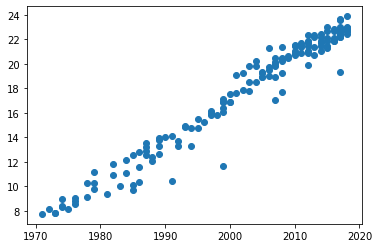

In [ ]:
plt.scatter(x, y);

In [ ]:
x = x - x.mean()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9))

In [ ]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

In [ ]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
r = model.fit(x, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 323.6391 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 300.1982 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 305.9077 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 235.3537 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 155.4074 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 124.8039 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 97.6530 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 75.4057 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 51.1452 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 34.3532 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 2

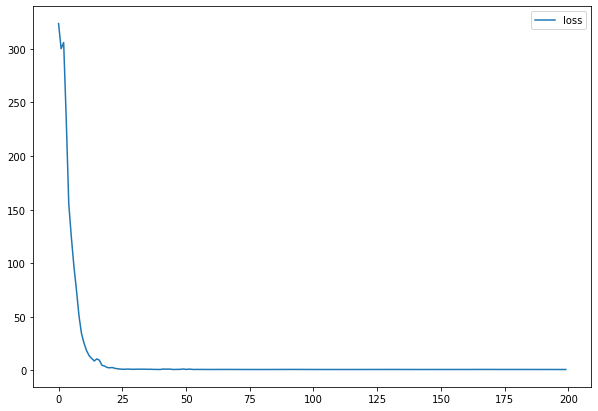

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(r.history["loss"], label="loss")
plt.legend();

In [ ]:
print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[array([[0.34244725]], dtype=float32), array([17.75304], dtype=float32)]


In [ ]:
a = model.layers[0].get_weights()[0][0][0]
a

0.34244725

In [ ]:
b = model.layers[0].get_weights()[1][0]
b

17.75304

In [ ]:
x[10], y[10]

(array([-26.19753086]), 8.779557455883728)

In [ ]:
a * x[10] + b

array([8.78176788])

In [ ]:
yhat = model.predict(x).flatten()

6/6 [==============================] - 0s 2ms/step


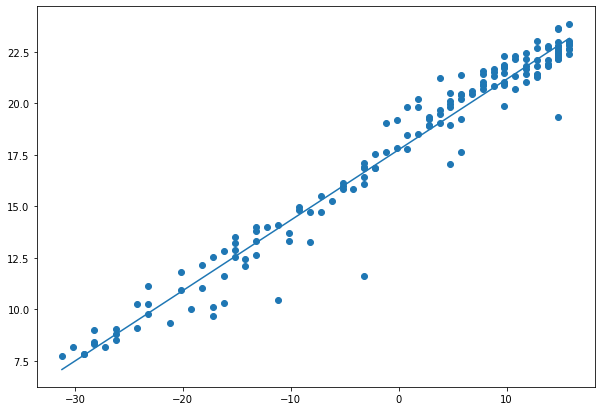

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x, y)
plt.plot(x, yhat);

## Regression exercice

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [ ]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [ ]:
target[0]

24.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [ ]:
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
target.min(), target.max()

(5.0, 50.0)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(13, )),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              metrics=["mse"])

In [ ]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

In [ ]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
r = model.fit(x_train, y_train,
              validation_data=(x_test, y_test),
              epochs=100,
              callbacks=[scheduler])

Epoch 1/100
13/13 [==============================] - 0s 11ms/step - loss: 534.3755 - mse: 534.3755 - val_loss: 461.3400 - val_mse: 461.3400 - lr: 0.0010
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 362.1523 - mse: 362.1523 - val_loss: 290.2513 - val_mse: 290.2513 - lr: 0.0010
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 216.7956 - mse: 216.7956 - val_loss: 173.5933 - val_mse: 173.5933 - lr: 0.0010
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 124.7062 - mse: 124.7062 - val_loss: 105.3085 - val_mse: 105.3085 - lr: 0.0010
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 75.6960 - mse: 75.6960 - val_loss: 68.3403 - val_mse: 68.3403 - lr: 0.0010
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 49.2247 - mse: 49.2247 - val_loss: 50.4836 - val_mse: 50.4836 - lr: 0.0010
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 36.2665 - mse: 36.2665

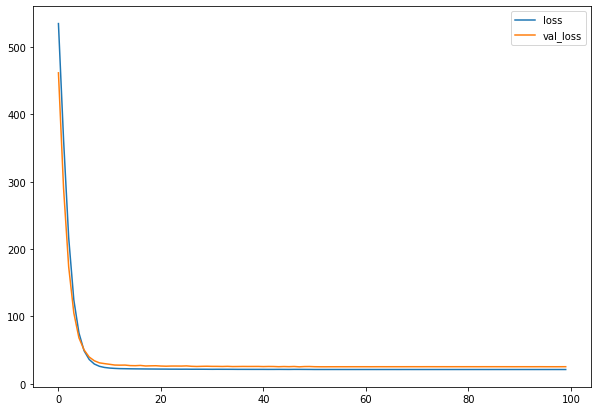

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();